# Advanced plotting
`scipp` offers a number of different ways to plot data from a `DataArray` or a `Dataset`. It uses the `matplotlib` graphing library to do so, as well as the `ipyvolume` project for 3D visualizations.

In [1]:
import numpy as np
import scipp as sc
from scipp.plot import plot

## Plotting 1-D data

### Basic plot

Plotting is done using the `plot` (or `scipp.plot.plot`) function.
Generally the information in a dataset is sufficient to produce a useful plot out of the box.

For example, a simple plot from a 1D dataset is produced as follows:

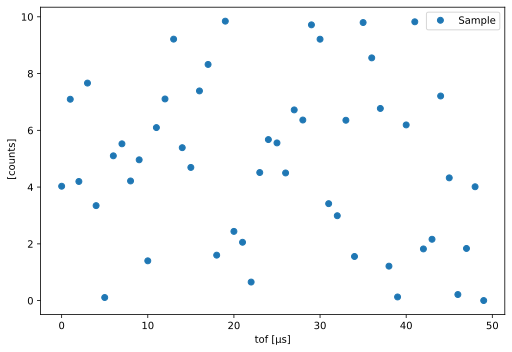

In [2]:
d = sc.Dataset()
N = 50
d.coords['tof'] = sc.Variable(['tof'], values=np.arange(N).astype(np.float64),
                                unit=sc.units.us)
d['Sample'] = sc.Variable(['tof'], values=10.0*np.random.rand(N),
                          unit=sc.units.counts)
plot(d)

### With error bars

Error bars are shown automatically if variances are present in the data:

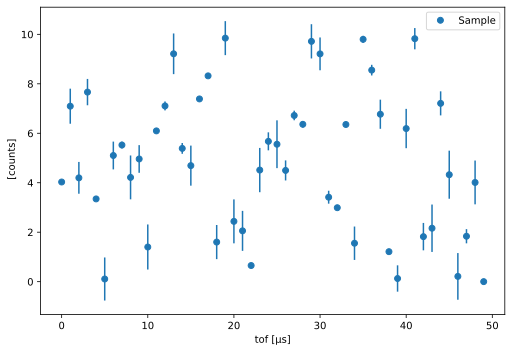

In [3]:
d['Sample'].variances = np.square(np.random.rand(N))
plot(d)

Note that the length of the errors bars is the standard-deviation, i.e., the square root of the variances stored in the data.

### Multiple variables on the same axes

If a dataset contains more than one 1D variable with the same coordinates, they are plotted on the same axes:

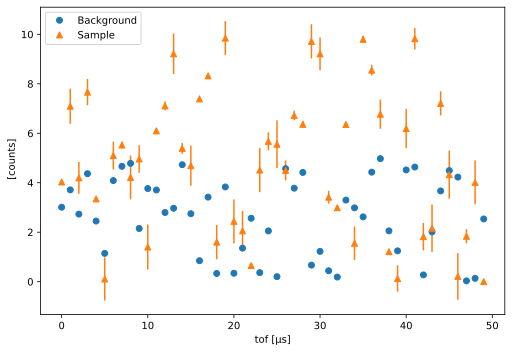

In [4]:
d['Background'] = sc.Variable(['tof'], values=5.0*np.random.rand(N),
                              unit=sc.units.counts)
plot(d)

It is possible to hide the error bars with

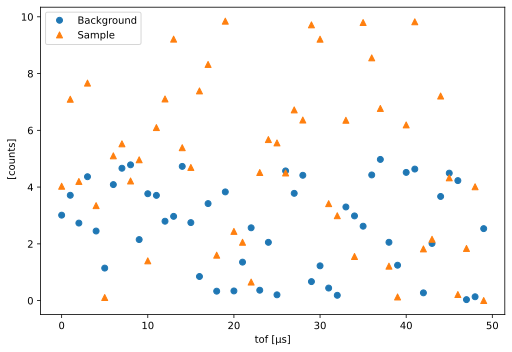

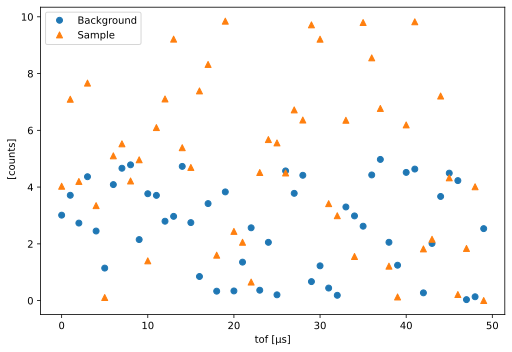

In [5]:
plot(d, variances=False)
plot(d, variances={'Sample': False})

We can always plot just a single item of the dataset:

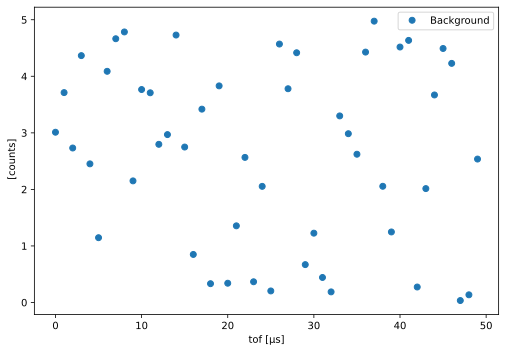

In [6]:
plot(d['Background'])

### Customizing linestyles, markers and colors

Linestyles can be customized following the Matplotlib API.
For instance, it is possible to connect the dots by setting `linestyle='solid'`:

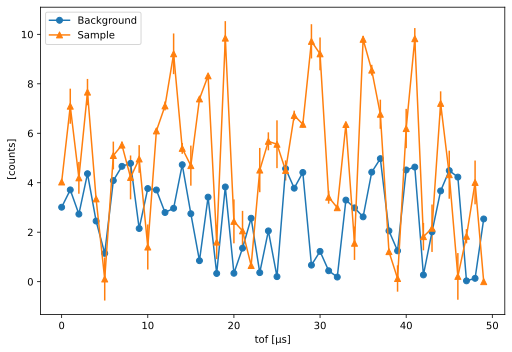

In [7]:
plot(d, linestyle='solid')

Marker colors and symbols can be changed via the `color` and `marker` keyword arguments:

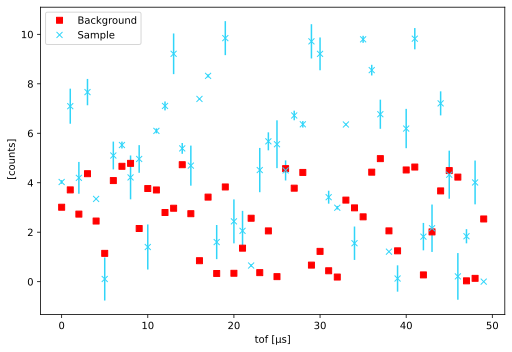

In [8]:
plot(d, color=['red', '#30D5F9'], marker=['s', 'x'])

The supplied `color` and `marker` arguments can also be a list of integers, which correspond to one of the pre-defined [colors](https://matplotlib.org/3.1.1/users/dflt_style_changes.html) or [markers](https://matplotlib.org/3.1.1/api/markers_api.html) (which were taken from matplotlib):

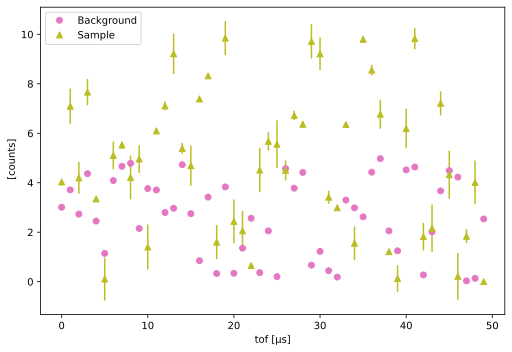

In [9]:
plot(d, color=[6, 8])

### Logarithmic scales

Logarithmic axes are supported as follows:

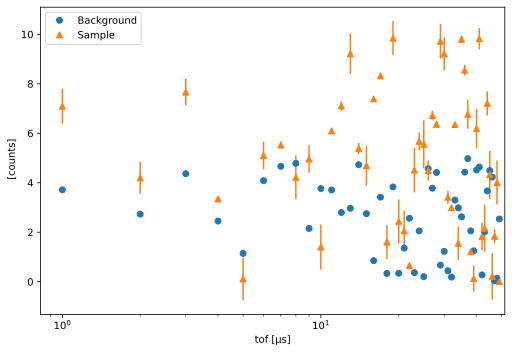

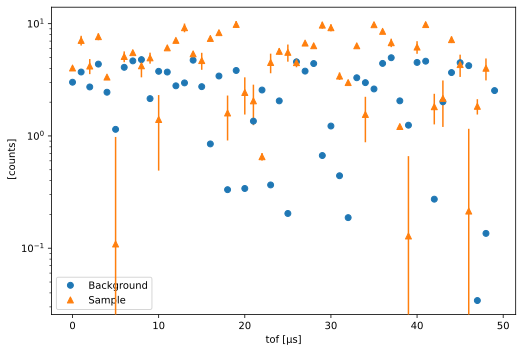

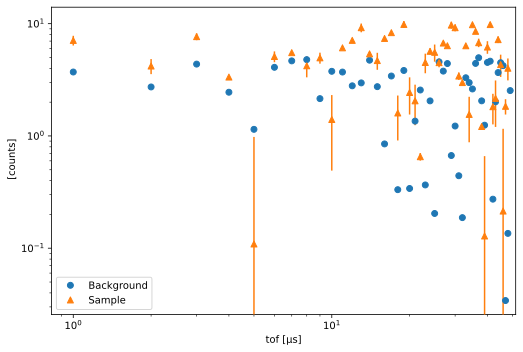

In [10]:
plot(d, logx=True)
plot(d, logy=True)
plot(d, logxy=True)

### Histograms
Histograms are automatically generated if the coordinate is bin edges:

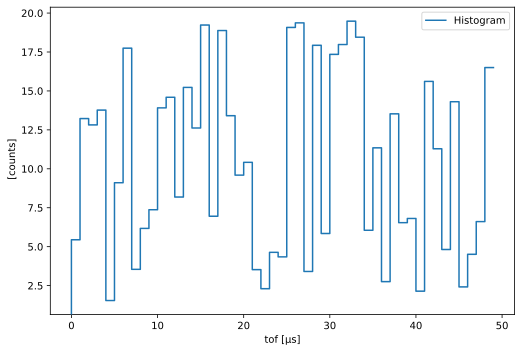

In [11]:
d['Histogram'] = sc.Variable(['tof'], values=20.0*np.random.rand(N-1),
                             unit=sc.units.counts)
plot(d['Histogram'])

and with error bars

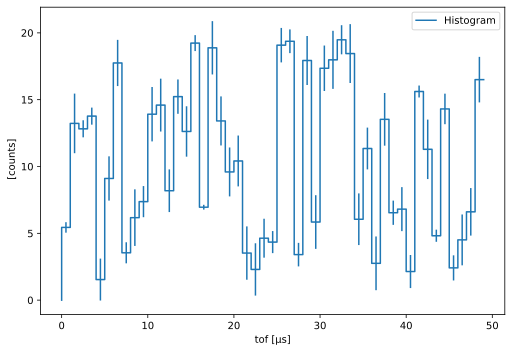

In [12]:
d['Histogram'].variances = 5.0*np.random.rand(N-1)
plot(d['Histogram'])

The histogram color can be customized:

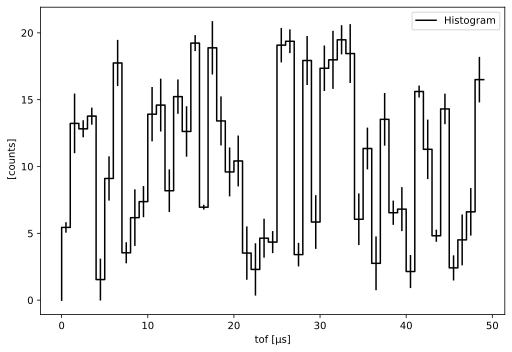

In [13]:
plot(d['Histogram'], color='#000000')

### Multiple 1D variables with different dimensions

`scipp.plot` also supports multiple 1-D variables with different dimensions (note that the data entries are grouped onto the same graph if they have the same dimension and unit):

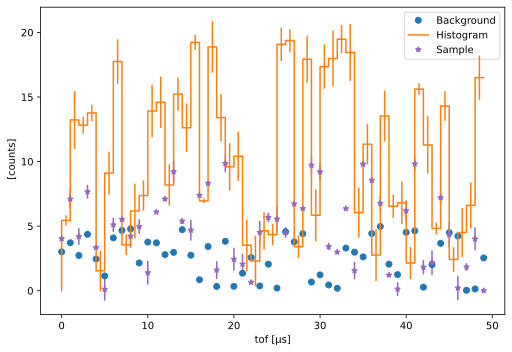

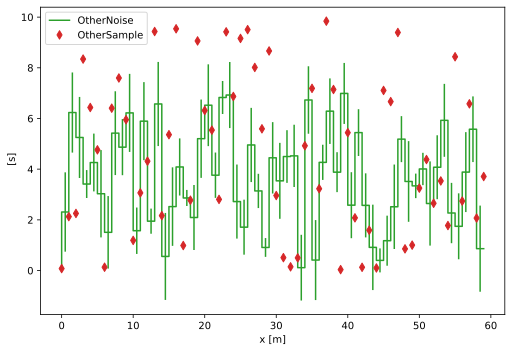

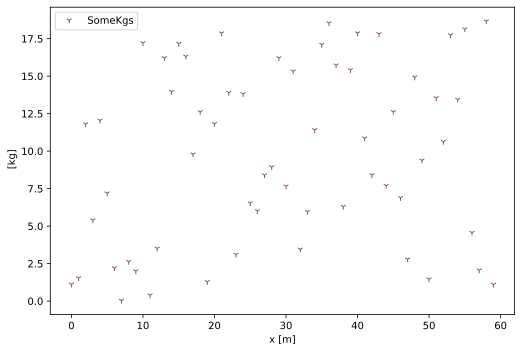

In [14]:
M = 60
d.coords['x'] = sc.Variable(['x'],
                              values=np.arange(M).astype(np.float64),
                              unit=sc.units.m)
d['OtherSample'] = sc.Variable(['x'], values=10.0*np.random.rand(M),
                                   unit=sc.units.s)
d['OtherNoise'] = sc.Variable(['x'], values=7.0*np.random.rand(M-1),
                                  variances=3.0*np.random.rand(M-1),
                                  unit=sc.units.s)
d['SomeKgs'] = sc.Variable(['x'], values=20.0*np.random.rand(M),
                                   unit=sc.units.kg)
plot(d)

### Custom labels along x axis

Sometimes one wishes to have `labels` along the X axis instead of the coordinate. This can be achieved via the `axes` keyword argument:

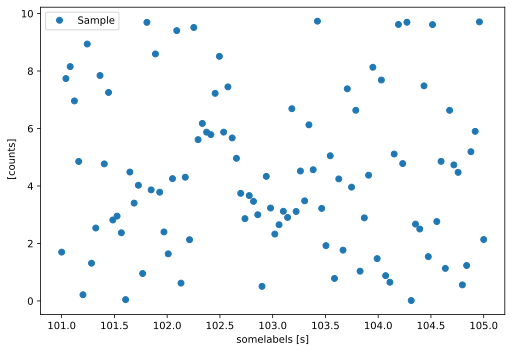

In [15]:
d1 = sc.Dataset()
N = 100
d1.coords['tof'] = sc.Variable(['tof'],
                                 values=np.arange(N).astype(np.float64),
                                 unit=sc.units.us)
d1['Sample'] = sc.Variable(['tof'],
                           values=10.0 * np.random.rand(N),
                           unit=sc.units.counts)
d1.coords['somelabels'] = sc.Variable(['tof'],
                                      values=np.linspace(101., 105., N),
                                      unit=sc.units.s)
plot(d1, axes=['somelabels'])

If one has multiple entries in a `Dataset`, the labels corresponding to each dimension need to be specified in a dictionary-like fashion:

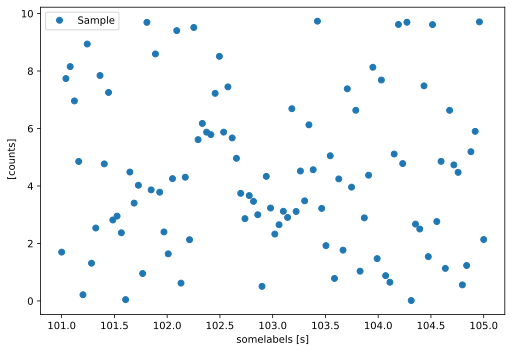

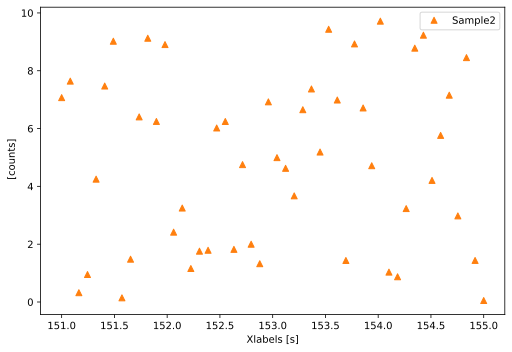

In [16]:
M = 50
d1.coords['x'] = sc.Variable(['x'],
                             values=np.arange(M).astype(np.float64),
                             unit=sc.units.m)
d1['Sample2'] = sc.Variable(['x'],
                            values=10.0 * np.random.rand(M),
                            unit=sc.units.counts)
d1.coords['Xlabels'] = sc.Variable(['x'],
                                   values=np.linspace(151., 155., M),
                                   unit=sc.units.s)
plot(d1, axes={'x': 'Xlabels', 'tof': 'somelabels'})

## Plotting 2-D data

### 2-D data as an image

2-D variables are plotted as images, with a colormap:

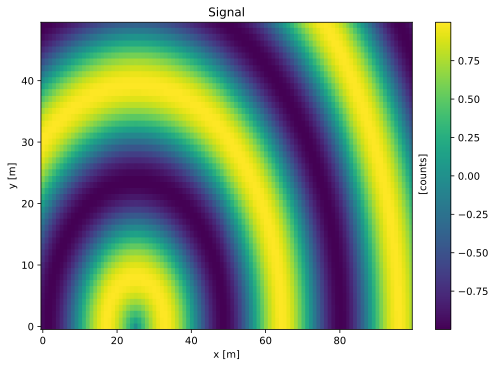

In [17]:
N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)
d1 = sc.Dataset()
d1.coords['x'] = sc.Variable(['x'], values=xx, unit=sc.units.m)
d1.coords['y'] = sc.Variable(['y'], values=yy, unit=sc.units.m)
d1['Signal'] = sc.Variable(['y', 'x'], values=a, unit=sc.units.counts)
plot(d1)

The dimension displayed along each axis of the image can be selected with the `axes` keyword argument which accepts a list of dimensions:

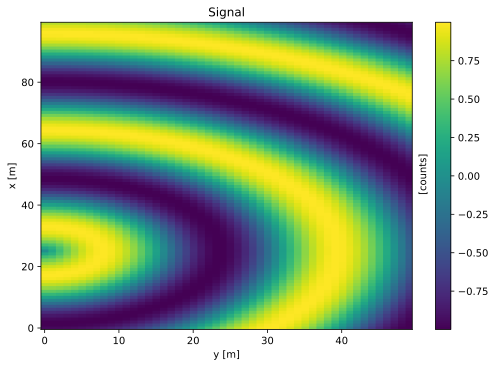

In [18]:
plot(d1, axes=['x', 'y'])

### 2-D data with variances

If variances are present, they are not displayed by default, but they can be shown alongside the data values by using `variances=True`:

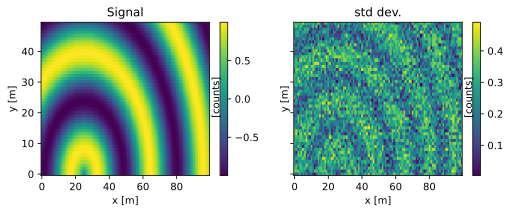

In [19]:
d1['Signal'].variances = np.abs(np.random.normal(a * 0.1, 0.05))
plot(d1, variances=True)

### Changing the colorscale

Changing the colorscale is handled in a similar way to the matplotlib API. The colormap is defined by the `cmap` argument:

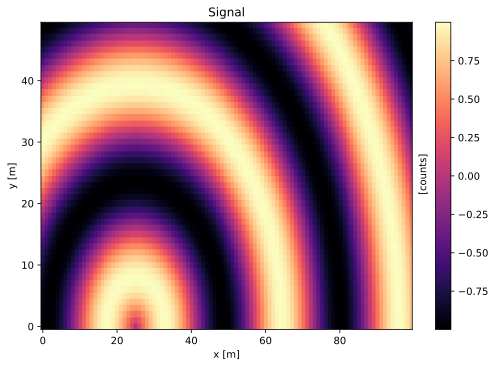

In [20]:
plot(d1, cmap='magma')

A logarithmic colorscale is obtained by setting `log` to `True`:

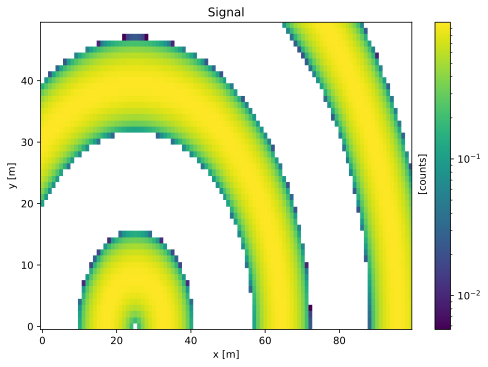

In [21]:
plot(d1, log=True)

Upper and lower limits on the colorscale can be placed using `vmin` and `vmax`:

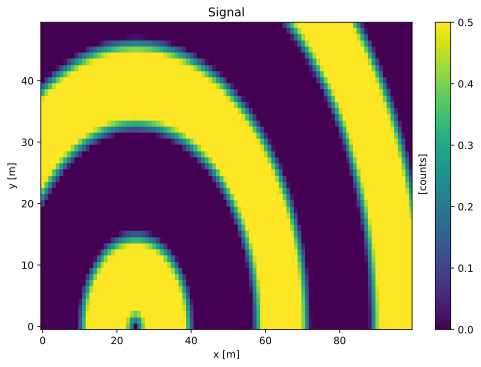

In [22]:
plot(d1, vmin=0, vmax=0.5)

And this can also be applied to the variances by using dicts to separate the values and variances parameters. Note that to show the variances, we need to have `'show': True` in the variances dict:

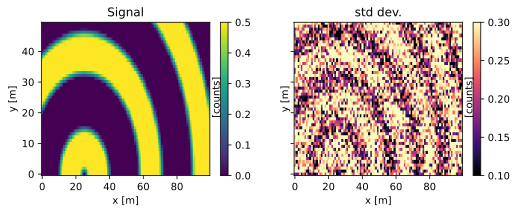

In [23]:
plot(d1, values={'vmin': 0, 'vmax': 0.5},
     variances={'show':True, 'vmin': 0.1, 'vmax': 0.3, 'cmap': 'magma'})

Note that the 'global' (non-dict) keyword argument will apply to both values and variances, but will be over-ridden by dict-like arguments, e.g.

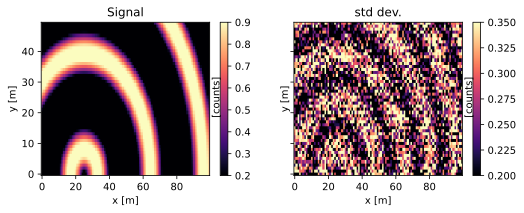

In [24]:
plot(d1, cmap='magma', vmin=0.2, vmax=0.9, variances={'show': True, 'vmax': 0.35})

### Using labels along some axis

Just like in the 1d plots, we can use labels along a chosen dimension:

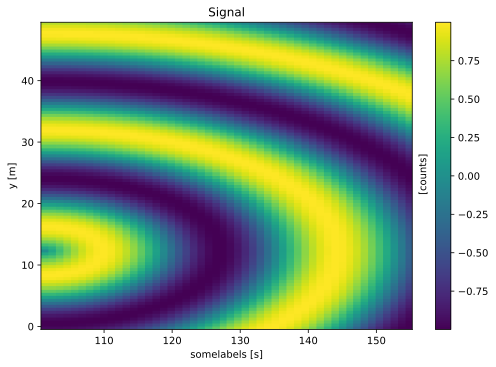

In [25]:
d1.coords['somelabels'] = sc.Variable(['x'],
                                      values=np.linspace(101., 155., N),
                                      unit=sc.units.s)
plot(d1, axes=['y', 'somelabels'])

### Collapsing dimensions

Sometimes it is useful to collapse one or more of the data's dimensions, if for instance most detector pixels contain noise, but one specific channel contains a strong signal. This is done by specifying the dimension to be displayed along the x axis as a keyword argument. All other dimensions will be collapsed.

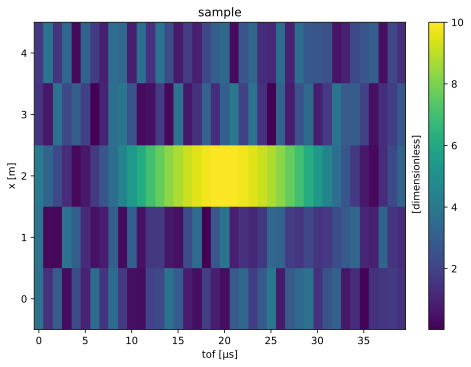

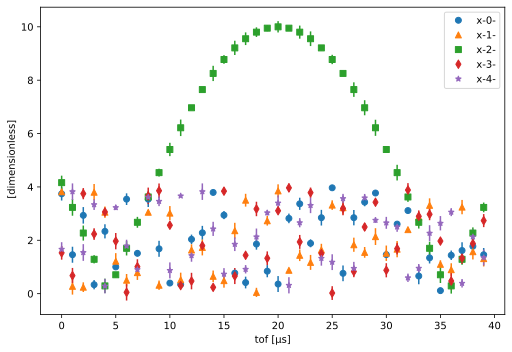

In [26]:
N = 40
M = 5
x = np.arange(N).astype(np.float64)
b = 0.5 * N
a = 4.0*np.random.rand(M, N)
a[2, :] = np.abs(10.0 * np.cos((x-b)*2.0/b))
d2 = sc.Dataset()
d2.coords['tof'] = sc.Variable(['tof'], values=x, unit=sc.units.us)
d2.coords['x'] = sc.Variable(['x'], values=np.arange(M).astype(np.float64),
                               unit=sc.units.m)
d2['sample'] = sc.Variable(['x', 'tof'], values=a,
                           variances=0.1*np.random.rand(M, N))
plot(d2)
plot(d2, collapse='tof')

### Image aspect ratio
By default, the aspect ratio of 2D images is not preserved; images are stretched to the size of the figure. You can choose to preserve the aspect ratio via the `aspect` keyword argument:

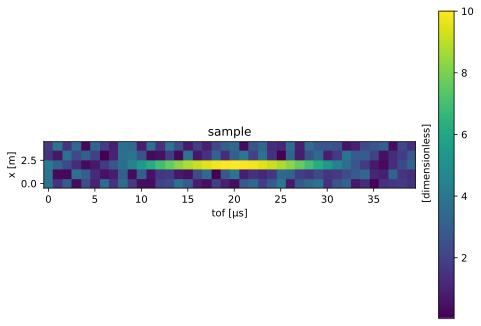

In [27]:
plot(d2, aspect='equal')

You can also make this a permanent setting by editing the config file (possible options are `'equal'` and `'auto'`):

In [28]:
sc.config.update({'plot.aspect': 'equal'})
sc.config.update({'plot.aspect': 'auto'})

## Plotting data with 3 and more dimensions

Data with 3 or more dimensions are by default represented by a 2-D image, accompanied by sliders to navigate the extra dimensions (one slider per dimension above 2).

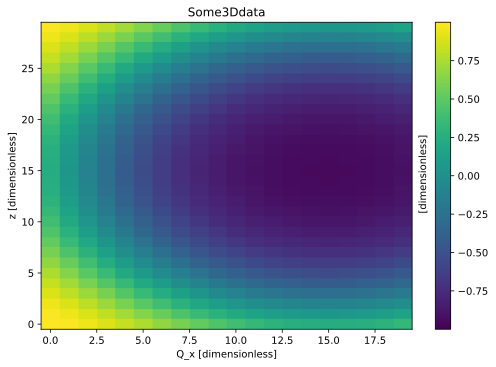

In [29]:
N = 50
M = 40
L = 30
K = 20
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
zz = np.arange(L, dtype=np.float64)
qq = np.arange(K, dtype=np.float64)
x, y, z, q = np.meshgrid(xx, yy, zz, qq, indexing='ij')
b = N/20.0
c = M/2.0
d = L/2.0
r = np.sqrt(((x-c)/b)**2 + ((y-c)/b)**2 + ((z-d)/b)**2  + ((q-d)/b)**2)
a = np.sin(r)
d3 = sc.Dataset()
d3.coords['x'] = sc.Variable(['x'], values=xx)
d3.coords['y'] = sc.Variable(['y'], values=yy)
d3.coords['z'] = sc.Variable(['z'], values=zz)
d3.coords['Q_x'] = sc.Variable(['Q_x'], values=qq)
d3['Some3Ddata'] = sc.Variable(['x', 'y', 'z', 'Q_x'], values=a,
                               variances=np.abs(np.random.normal(a * 0.1, 0.05)))
plot(d3)

![sliders4d](../images/plotting/sliders4d.png)

By default, the two innermost dimensions are used for the image, and the rest will be allocated to a slider.
This can be changed, either interactively using the buttons, or by specifying the order of the axes in the `plot` command:

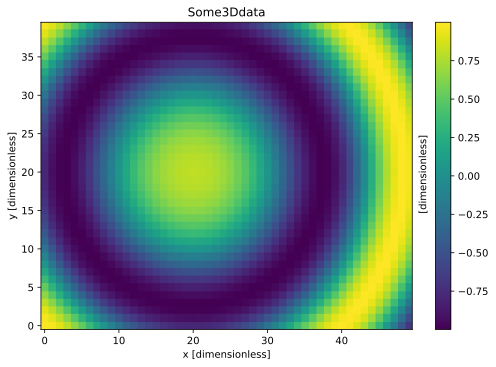

In [30]:
plot(d3, axes=['z', 'Q_x', 'y', 'x'])

![sliders4dv2](../images/plotting/sliders4dv2.png)

### Plotting in 3 dimensions
It is also possible to use a 3d projection. To use 3d visualization, you will have to install `ipyvolume` and `ipyevents` on your system, and enable the `ipyevents` jupyter extension:
```
conda install -c conda-forge ipyvolume ipyevents
jupyter nbextension enable --py ipyevents
```
To view the 3d projection, use:

In [31]:
plot(d3, projection='3d')

![proj3d](../images/plotting/threeslice.png)

### LAMP's Superplot
Finally, a `1d` projection is also available for multidimensional data, with the possibility to keep/remove lines that are plotted, a behaviour we copied from LAMP's [Superplot](https://github.com/mantidproject/documents/blob/master/Requirements/Visualisation_and_Analysis/superplot.md) which was very popular in the neutron physics community.

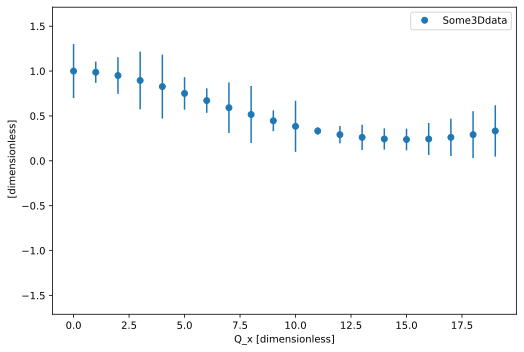

In [32]:
plot(d3, projection='1d')

![superplot](../images/plotting/superplot_widgets.png)

## Convenience Methods
A small number of convenience methods are included in the `plot` module which provide shortcuts to the different projections. These are `image`, `threeslice`, and `superplot`, and are used in the following way:

In [33]:
from scipp import plot as pl
pl.threeslice(d3)

![threeslice](../images/plotting/threeslice.png)

## Plotting masks

If a dataset contains masks, the symbols of masks data points will have a thick black contour in a 1D plot:

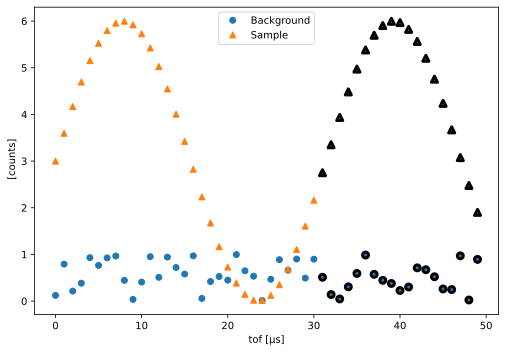

In [34]:
d4 = sc.Dataset()
N = 50
x = np.arange(N).astype(np.float64)
d4.coords['tof'] = sc.Variable(['tof'], values=x,
                                 unit=sc.units.us)
d4['Sample'] = sc.Variable(['tof'], values=3*np.sin(x/5)+3,
                           unit=sc.units.counts)
d4['Background'] = sc.Variable(['tof'], values=1.0*np.random.rand(N),
                               unit=sc.units.counts)
d4.masks['mask1'] = sc.Variable(['tof'],
                                values=np.where(np.abs(x-40) < 10, True, False))
plot(d4)

A toggle button below the plot can be used to hide/show the masks. The color of the masks can be changed as follows:

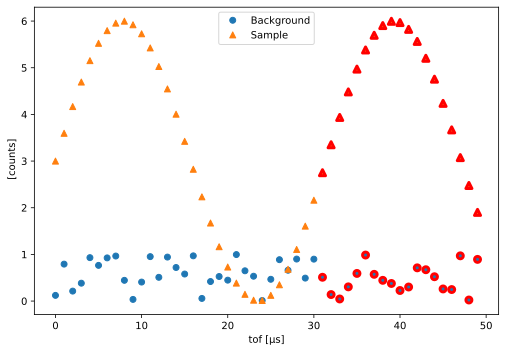

In [35]:
plot(d4, masks={'color': 'red'})

### Masks on histograms

Masks on a histogram show up as a thick black line:

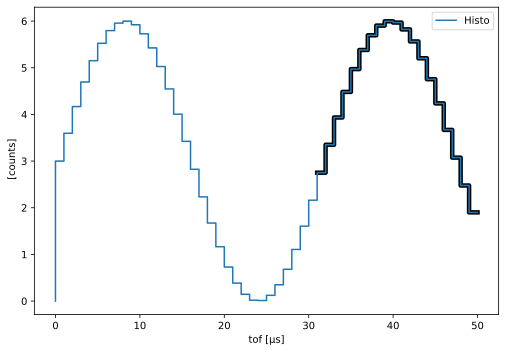

In [36]:
d4 = sc.Dataset()
N = 50
x = np.arange(N+1).astype(np.float64)
d4.coords['tof'] = sc.Variable(['tof'], values=x,
                                 unit=sc.units.us)
d4['Histo'] = sc.Variable(['tof'], values=3*np.sin(x[:-1]/5)+3,
                           unit=sc.units.counts)
d4.masks['mask1'] = sc.Variable(['tof'],
                                values=np.where(np.abs(x[:-1]-40) < 10, True, False))
plot(d4)

### Masks on 2D images

Masks on a 2D dataset will appear as greyed out on the image:

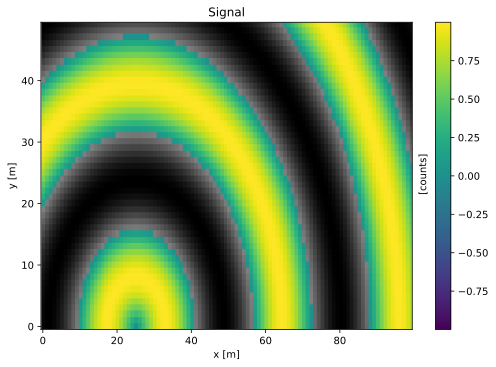

In [37]:
N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)
d1 = sc.Dataset()
d1.coords['x'] = sc.Variable(['x'], values=xx, unit=sc.units.m)
d1.coords['y'] = sc.Variable(['y'], values=yy, unit=sc.units.m)
d1['Signal'] = sc.Variable(['y', 'x'], values=a, unit=sc.units.counts)
d1.masks['mask1'] = sc.Variable(['y', 'x'], values=np.where(a < 0, True, False))
plot(d1)

The mask can be represented as a solid color with

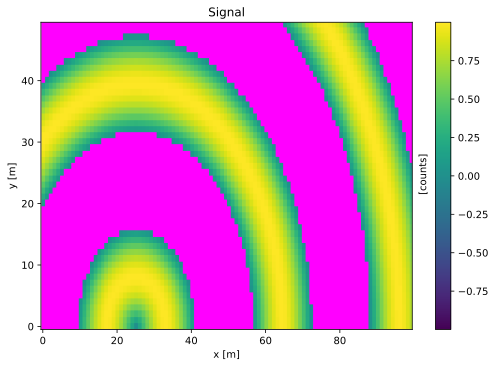

In [38]:
plot(d1, masks={'color': 'magenta'})

We also note that any 1D mask will automatically broadcast onto a 2D image:

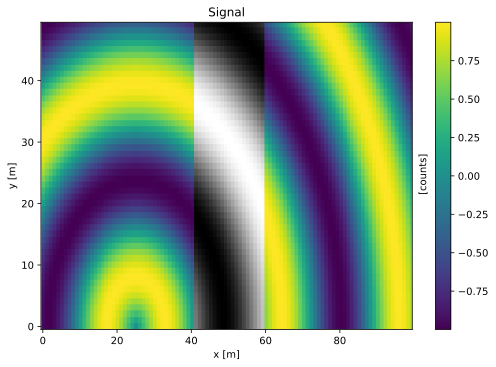

In [39]:
d1.masks['mask1'] = sc.Variable(['x'], values=np.where(np.abs(xx-50) < 10, True, False))
plot(d1)

## Plotting sparse data
If a `Dataset` contains sparse data, it is possible to plot the data directly using some on-the-fly histogramming, the parameters of which are specified in the `bins` keyword argument. This can either be a single integer (the number of bins; in this case the extents of the sparse dimension are automatically computed), a numpy array (representing the bin edges), or a `scipp` Variable (representing the bin edges, see https://scipp.github.io/generated/scipp.histogram.html):

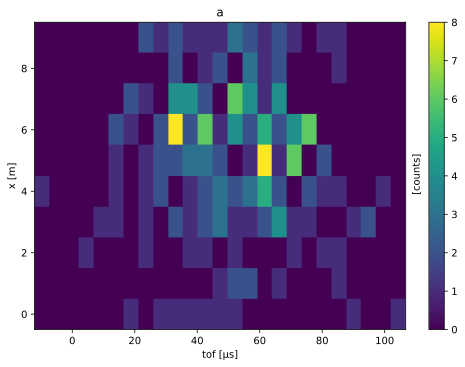

In [40]:
N = 50
M = 10
var = sc.Variable(dims=['x'],
                  shape=[M],
                  dtype=sc.dtype.event_list_float64,
                  unit=sc.units.us)
dat = sc.Variable(dims=['x'],
                  values=np.ones(M),
                  variances=np.ones(M),
                  unit=sc.units.counts)
for i in range(M):
    v = np.random.normal(50.0, scale=20.0, size=int(np.random.rand()*N))
    var['x', i].values = v

d5 = sc.Dataset()
d5.coords['x'] = sc.Variable(['x'], values=np.arange(M), unit=sc.units.m)
d5['a'] = sc.DataArray(data=dat, coords={'tof': var})
sc.show(d5)
plot(d5, bins={'tof': 25})

## Saving figures
Static `pdf` or `png` copies of the figures can be saved to file (note that any sliders and buttons displayed under a figure is not saved to file). This is achieved as follows:

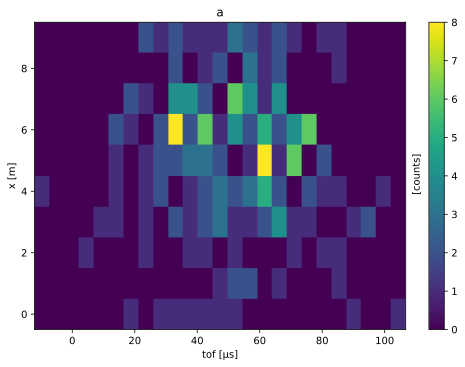

In [41]:
plot(d5, bins={'tof': 25}, filename='myfigure.pdf')

It is also possible to save the 3D figures as a fully interactive html file:

In [42]:
plot(d3, projection='3d', filename='my3dplot.html')